In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the bug, it is still meowing at the bug and the fish",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,1,2,1,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.200000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.142857,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.000000,0.142857,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.142857,0.142857,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.142857,0.285714,0.000000,0.000000
3,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.272727,0.090909,0.0000,0.090909,0.090909,0.090909,0.090909
4,0.062500,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.062500,0.0,0.062500,0.125,0.0625,0.062500,0.0625,0.000000,0.000000,0.000000,0.0625,0.000000,0.187500,0.000000,0.000000
5,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.111111,0.0,0.166667,0.000,0.0000,0.055556,0.0000,0.055556,0.000000,0.000000,0.0000,0.055556,0.277778,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000,0.0000,0.000000,0.0000,0.000000,0.333333,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [8]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,a,and,at,ate,blue,bought,bright,bug,cat,fish,is,it,meow,onc,orang,penni,saw,still,store,the,to,went
0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0
3,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,3,1,0,1,1,1,1
4,0,1,2,0,0,0,0,2,0,1,1,2,2,1,0,0,0,1,0,3,0,0
5,0,0,2,0,0,0,0,0,3,2,3,0,1,0,1,0,0,0,1,5,0,0
6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [9]:
vec = CountVectorizer(tokenizer=textblob_tokenizer, stop_words='english')
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,3,1,1,1
4,0,0,0,0,2,0,1,2,1,0,0,0,0,0
5,0,0,0,0,0,3,2,1,0,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [10]:
# Term Frequency (TF)
# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l1', # ELL - ONE
                      use_idf=False)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


In [11]:
df.sort_values(by='fish', ascending=False)

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111


In [12]:
df[['fish', 'meow']]

,fish,meow
0,0.200000,0.000000
1,0.166667,0.000000
2,0.250000,0.000000
3,0.111111,0.000000
4,0.166667,0.333333
5,0.250000,0.125000
6,0.500000,0.000000


In [13]:
# Add them together!
# Percent of words about either 'meow' or 'fish'
df.meow + df.fish

0    0.200000
1    0.166667
2    0.250000
3    0.111111
4    0.500000
5    0.375000
6    0.500000
dtype: float64

In [14]:
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [15]:
# Inverse Document Frequency (IDF)

# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l1',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.235463,0.235463,0.235463,0.000000,0.000000,0.118871,0.000000,0.000000,0.000000,0.174741,0.000000,0.000000,0.000000
1,0.000000,0.190587,0.190587,0.190587,0.000000,0.000000,0.096216,0.000000,0.000000,0.190587,0.141437,0.000000,0.000000,0.000000
2,0.297654,0.000000,0.000000,0.000000,0.000000,0.297654,0.150267,0.000000,0.000000,0.000000,0.000000,0.000000,0.254425,0.000000
3,0.125073,0.000000,0.000000,0.000000,0.125073,0.000000,0.063142,0.000000,0.000000,0.000000,0.278455,0.150675,0.106908,0.150675
4,0.000000,0.000000,0.000000,0.000000,0.350291,0.000000,0.088420,0.350291,0.210997,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.437035,0.147088,0.145678,0.000000,0.145678,0.000000,0.000000,0.124521,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404858,0.000000,0.000000,0.000000,0.595142,0.000000,0.000000,0.000000


In [16]:
# OLD dataframe
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [17]:
# NEW dataframe
pd.DataFrame({
    'fish': idf_df.fish,
    'meow': idf_df.meow,
    'meow + fish': idf_df.meow + idf_df.fish
})

,fish,meow,meow + fish
0,0.118871,0.000000,0.118871
1,0.096216,0.000000,0.096216
2,0.150267,0.000000,0.150267
3,0.063142,0.000000,0.063142
4,0.088420,0.350291,0.438712
5,0.147088,0.145678,0.292766
6,0.404858,0.000000,0.404858


In [18]:
# We have to *get rid of* norm='l1' because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


In [19]:
# OLD dataframe
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [20]:
# NEW dataframe
pd.DataFrame({
    'fish': idf_df.fish,
    'meow': idf_df.meow,
    'meow + fish': idf_df.meow + idf_df.fish
})

# .5 => .8 "It meowed once at the bug, it is still meowing at the bug and the fish",
# .375 => .56 "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
# .5 => .56 "Penny is a fish"

,fish,meow,meow + fish
0,0.258786,0.000000,0.258786
1,0.230292,0.000000,0.230292
2,0.292176,0.000000,0.292176
3,0.153301,0.000000,0.153301
4,0.162043,0.641958,0.804000
5,0.282766,0.280055,0.562821
6,0.562463,0.000000,0.562463


In [21]:
# Section Three: Document Similarity

# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


In [22]:
# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

number_of_clusters=2
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit
# It just means "HEY TAKE A LOOK AT AND TRY ON MY TEXT STUFF"

<bound method KMeans.fit of KMeans(n_clusters=2)>

In [23]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: penni fish bright bought blue
Cluster 1: cat meow fish store bug


In [24]:
km.labels_

array([0, 0, 1, 0, 1, 1, 0])

In [25]:
texts

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish']

In [27]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,0
1,Penny bought bright blue and orange fish.,0
2,The cat ate a fish at the store.,1
3,Penny went to the store. Penny ate a bug. Penn...,0
4,"It meowed once at the bug, it is still meowing...",1
5,The cat is at the fish store. The cat is orang...,1
6,Penny is a fish,0


In [28]:
# How about 3 categories of documents?


# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit
# It just means "HEY TAKE A LOOK AT AND TRY ON MY TEXT STUFF"

<bound method KMeans.fit of KMeans(n_clusters=3)>

In [29]:
km.labels_

array([2, 2, 1, 0, 1, 1, 0])

In [30]:
results = pd.DataFrame({
    'text': texts,
    'category': km.labels_
})
results

,text,category
0,Penny bought bright blue fishes.,2
1,Penny bought bright blue and orange fish.,2
2,The cat ate a fish at the store.,1
3,Penny went to the store. Penny ate a bug. Penn...,0
4,"It meowed once at the bug, it is still meowing...",1
5,The cat is at the fish store. The cat is orang...,1
6,Penny is a fish,0


In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: penni fish went
Cluster 1: cat meow fish
Cluster 2: bright bought blue


In [34]:
# That was confusing. Can we visualize it?

texts = [
    'Penny bought bright blue fishes.',
    'Penny bought bright blue and orange bowl.',
    'The cat ate a fish at the store.',
    'Penny went to the store. Penny ate a bug. Penny saw a fish.',
    'It meowed once at the bug, it is still meowing at the bug and the fish',
    'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
    'Penny is a fish.',
    'Penny Penny she loves fishes Penny Penny is no cat.',
    'The store is closed now.',
    'How old is that tree?',
    'I do not eat fish I do not eat cats I only eat bugs.'
]

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True,
                      max_features=2)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

,fish,penni
0,0.605349,0.795961
1,0.000000,1.000000
2,1.000000,0.000000
3,0.245735,0.969337
4,1.000000,0.000000
5,1.000000,0.000000
6,0.605349,0.795961
7,0.186785,0.982401
8,0.000000,0.000000
9,0.000000,0.000000


Text(0, 0.5, 'Penny')

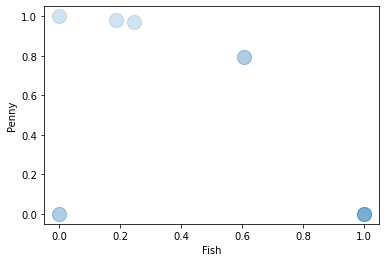

In [35]:
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.2, s=200)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

In [36]:
number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=3)

In [37]:
# Move the labels into a column of our dataframe
# the first label matches the first row, second label is second row, etc
df['category'] = km.labels_
df

,fish,penni,category
0,0.605349,0.795961,0
1,0.000000,1.000000,0
2,1.000000,0.000000,1
3,0.245735,0.969337,0
4,1.000000,0.000000,1
5,1.000000,0.000000,1
6,0.605349,0.795961,0
7,0.186785,0.982401,0
8,0.000000,0.000000,2
9,0.000000,0.000000,2


Text(0, 0.5, 'Penny')

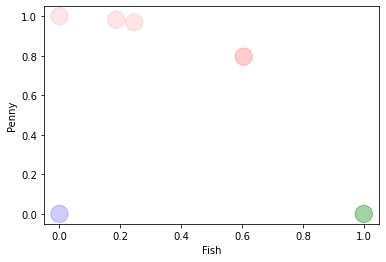

In [38]:
# Category 0 is red
# Category 1 is green
# Category 2 is blue
colormap = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# Create a list of colors from every single row
colors = df.apply(lambda row: colormap[row.category], axis=1)

# And plot it!
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Text(0, 0.5, 'Penny')

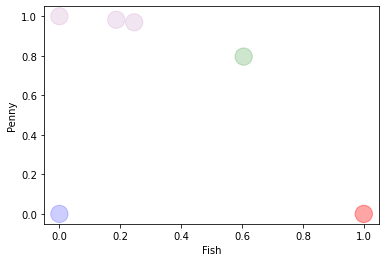

In [39]:
km = KMeans(n_clusters=4)
km.fit(matrix)
df['category'] = km.labels_

colormap = { 0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
colors = df.apply(lambda row: colormap[row.category], axis=1)
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

In [40]:
# Using more information

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(tokenizer=textblob_tokenizer, stop_words='english', use_idf=True)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df.head(2)

,ate,blue,bought,bowl,bright,bug,cat,close,eat,fish,love,meow,old,onc,onli,orang,penni,saw,store,tree,went
0,0.0,0.513353,0.513353,0.000000,0.513353,0.0,0.0,0.0,0.0,0.277013,0.0,0.0,0.0,0.0,0.0,0.000000,0.364239,0.0,0.0,0.0,0.0
1,0.0,0.412669,0.412669,0.482788,0.412669,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.412669,0.292801,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Penny')

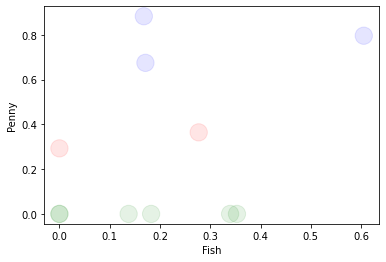

In [41]:
# Cluster with 3 categories
# only using the 'fish' and 'penni' categories
km = KMeans(n_clusters=3)
km.fit(df[['fish', 'penni']])

# Assign the category to the dataframe
df['category'] = km.labels_

# Build our color map
colormap = { 0: 'red', 1: 'green', 2: 'blue' }
colors = df.apply(lambda row: colormap[row.category], axis=1)

# Plot our scatter
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

In [42]:
# Time to get crazy

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(tokenizer=textblob_tokenizer, max_features=3, stop_words='english', use_idf=True)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df.head(2)

,cat,fish,penni
0,0.0,0.605349,0.795961
1,0.0,0.000000,1.000000


In [43]:
# Cluster
km = KMeans(n_clusters=4)
km.fit(df)

# Assign the category to the dataframe
df['category'] = km.labels_

# Build our color map
colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}
colors = df.apply(lambda row: colormap[row.category], axis=1)

Text(0, 0.5, 'Penny')

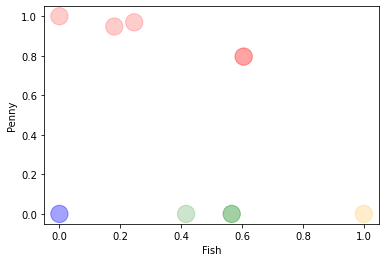

In [44]:
# Plot our scatter
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.2, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Text(0, 0.5, 'Cat')

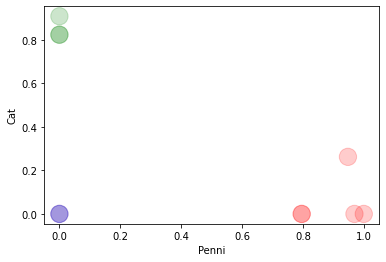

In [45]:
# Plot our scatter
ax = df.plot(kind='scatter', x='penni', y='cat', alpha=0.2, s=300, c=colors)
ax.set_xlabel("Penni")
ax.set_ylabel("Cat")

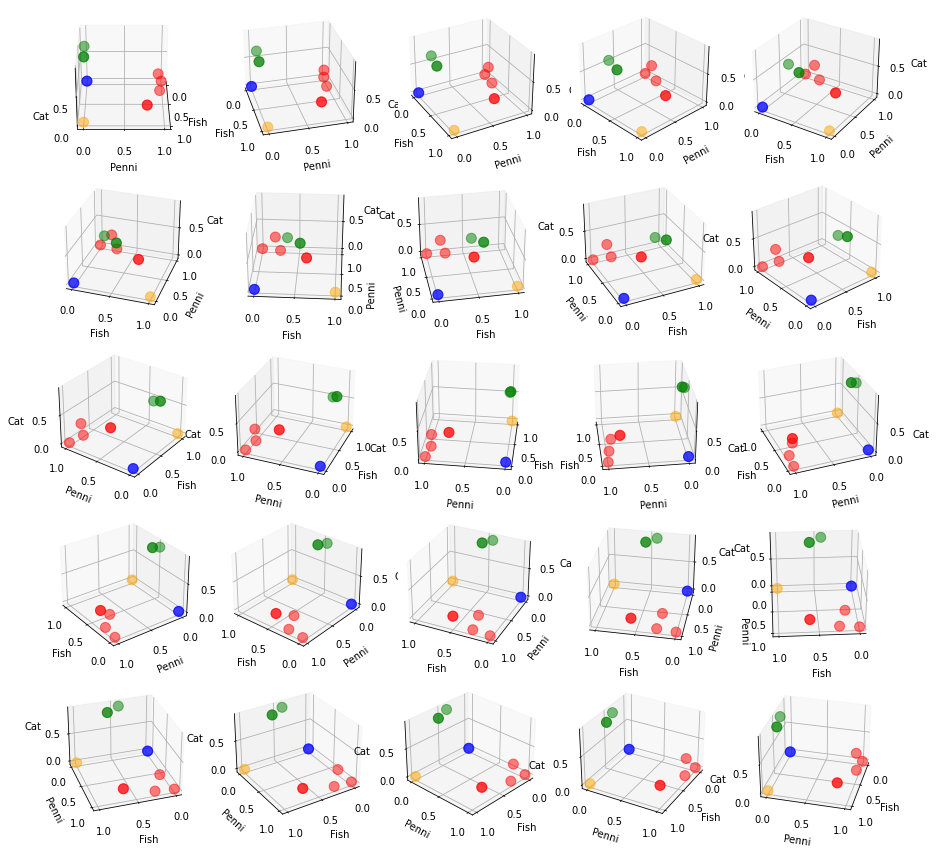

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    colormap = { 0: 'red', 1: 'green', 2: 'blue', 3: 'orange' }
    colors = df.apply(lambda row: colormap[row.category], axis=1)

    ax.scatter(df['fish'], df['penni'], df['cat'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('Fish')
    ax.set_ylabel('Penni')
    ax.set_zlabel('Cat')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)